## Astronomy 534 "Extragalactic Universe" (Winter 2025)

### Growth of cosmological perturbations

**Learning goals:** understand the non-linear growth of cosmological perturbations and the formation of dark matter halos.

The power spectrum of primordial perturbations is defined via the transfer function $T(k)$:

$$
   P(k) = A \, k^{n_s} \, T(k)^2 
$$

The normalization $A$ is obtained by integrating the power spectrum of all $k$ with a top-hat window function (the Fourier transform of a constant-density sphere) of radius $r = 8\, h^{-1}$ Mpc:

$$
   \sigma_8^2 = \frac{1}{(2\pi)^3} \int_0^\infty W^2(kr) \, P(k) \, 4\pi k^2 dk, 
   \quad\mathrm{where}\quad W(x) = {3 (\sin{x} - x \cos{x}) \over x^3}
$$
   
The product $kr$ is dimensionless, and therefore, a good unit for $k$ is $h$ Mpc$^{-1}$.

### Spherical shell collapse

Consider a spherical shell of initial radius $r_i$ at time $t_i$ with the average matter overdensity $\delta_i \ll 1$. For a cosmologically small region we can use Newtonian approximation and write the equation of motion of the shell radius:

$$
   \frac{1}{2} \left(\frac{dr}{dt}\right)^2 - \frac{GM}{r} = E \quad (1)
$$

If energy $E<0$ the shell is gravitationally bound - it will initially expand with the Hubble flow, turn around at a maximum radius $r_m$ (where the velocity is 0), and collapse to $r=0$. In this case the energy can be written as $E = - \frac{GM}{r_m}$.

The mass $M$ interior to the shell is constant and therefore the parametric solution is

$$
   r(t) = \frac{r_m}{2} (1-\cos\theta), \quad t = \frac{t_c}{2\pi} (\theta - \sin\theta)
$$

where $t_c$ is the collapse time, formally to $r=0$. The turn-around happens at $\frac{t_c}{2}$, or $\theta=\pi$.

Let's relate $t_c$ to the initial overdensity $\delta_i$. The mass within the shell is

$$
   M = \frac{4\pi}{3} \bar{\rho}_i (1+\delta_i) r_i^3
$$

and the mean density is related to the Hubble parameter as 

$$
   \bar{\rho} = \Omega_m\, \frac{3H^2}{8\pi G}
$$

The initial velocity is the Hubble flow plus a linear correction in $\delta_i$ given by equation 5.6 in Mo, van den Bosch & White:

$$
   \left(\frac{dr}{dt}\right)_i \approx H_i r_i \left( 1-\frac{\delta_i}{3} \right)
$$

Substituting this into equation (1) gives

$$
   \frac{4\pi}{3} G \bar{\rho}_i r_i^2 \frac{1}{\Omega_{m,i}} \left( 1-\frac{2}{3}\delta_i \right) = \frac{4\pi}{3} G \bar{\rho}_i r_i^2 (1+\delta_i) \left( 1-\frac{r_i}{r_m} \right)
$$

which simplifies to

$$
   \frac{r_i}{r_m} = 1 - \frac{1-\frac{2}{3}\delta_i}{(1+\delta_i) \Omega_{m,i}}
   \approx \frac{5}{3}\delta_i + 1 - \frac{1}{\Omega_{m,i}}
$$

The collapse time is

$$
   t_c^2 = (2\pi)^2 \frac{(r_m/2)^3}{GM}  = f \frac{\pi^2}{H_i^2} \delta_i^{-3}
$$

where the pre-factor $f$ is

$$
   f = \frac{\delta_i^3}{\frac{5}{3}\delta_i + 1 - \frac{1}{\Omega_{m,i}}} 
       \frac{1}{1+\delta_i} \frac{1}{\Omega_{m,i}}
     \approx \left(\frac{3}{5}\right)^3
$$

such that $f^{1/2} \approx 0.5$ and we obtain a simple result

$$
   t_c \approx \frac{\pi}{2 H_i} \delta_i^{-3/2}
$$

In the matter-dominated universe, $H(a) \approx H_0 \Omega_{m,0}^{1/2} a^{-3/2}$. The overdensity on a spatial scale $R$ can be written in terms of the present-day value $\sigma(R)$  times the growth function

$$
   \delta_i = \sigma(R) D_+(a) \approx \sigma(R) \, a
$$

and the initial time at which we considered the growth of perturbations remarkably cancels out:

$$
   t_c \approx \frac{\pi}{2 H_0  \Omega_{m,0}^{1/2}} \sigma(R)^{-3/2}
$$

All perturbations with the same present-day average overdensity $\sigma(R)$ collapse at the same time!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('mplstyle.txt')

In [2]:
# Planck 2018 cosmological paremeters
h100 = 0.677
Om0 = 0.1424/h100**2
Ob0 = 0.0224/h100**2
ns = 0.967
sigma8 = 0.81
zeq = 3387.
keq = 0.01034/h100 # in h Mpc^-1
Tcmb0 = 2.726      # in K

Here is an illustration of the evolution of density perturbations:

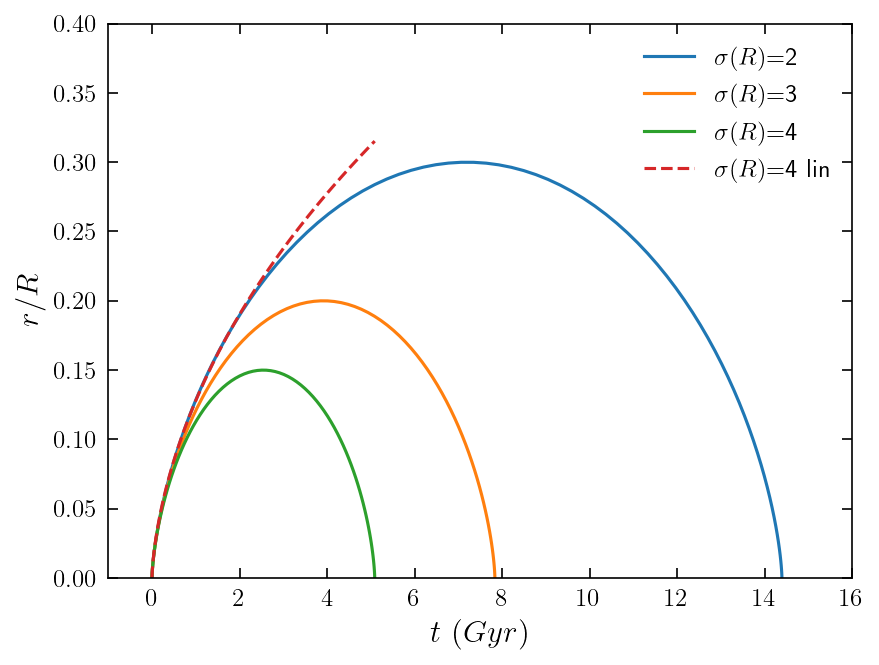

In [ ]:
invH0 = 9.78                 # Hubble time in Gyr: 1 over 100 km/s/Mpc
t0 = invH0/h100/np.sqrt(Om0) # present age in Gyr

def shell_collapse( sigmaR ):
    ai = 1e-4    
    ti = 2./3.*t0*ai**1.5
    deltai = sigmaR*ai
    ri = ai/(1.+deltai)**(1./3.)
    rm = ri/(5./3.*deltai)
    tc = 0.5*np.pi*t0/sigmaR**1.5
    
    thi = (ti/tc*12.*np.pi)**(1./3.)
    th = np.linspace(thi, 1.99*np.pi, 100)
    t = tc/(2.*np.pi)*(th - np.sin(th))
    r = rm/2.*(1-np.cos(th))
    
    a = (3./2.*t/t0)**(2./3.)
    rlin = ri*a/ai*((1+deltai)/(1+sigmaR*a))**(1./3.)
    return t, r, rlin, a

for sigmaR in [ 2, 3, 4 ]:
    t, r, rlin, a = shell_collapse( sigmaR )
    plt.plot(t, r, label=(r'$\sigma(R)$=%g'%sigmaR))
    if sigmaR == 4:
        plt.plot(t, rlin, '--', label=(r'$\sigma(R)$=%g lin'%sigmaR))
    
plt.xlabel(r'$t \ (Gyr)$')
plt.ylabel(r'$r/R$')
plt.xlim(-1, 16)
plt.ylim(0, 0.4)
plt.legend(loc='upper right')

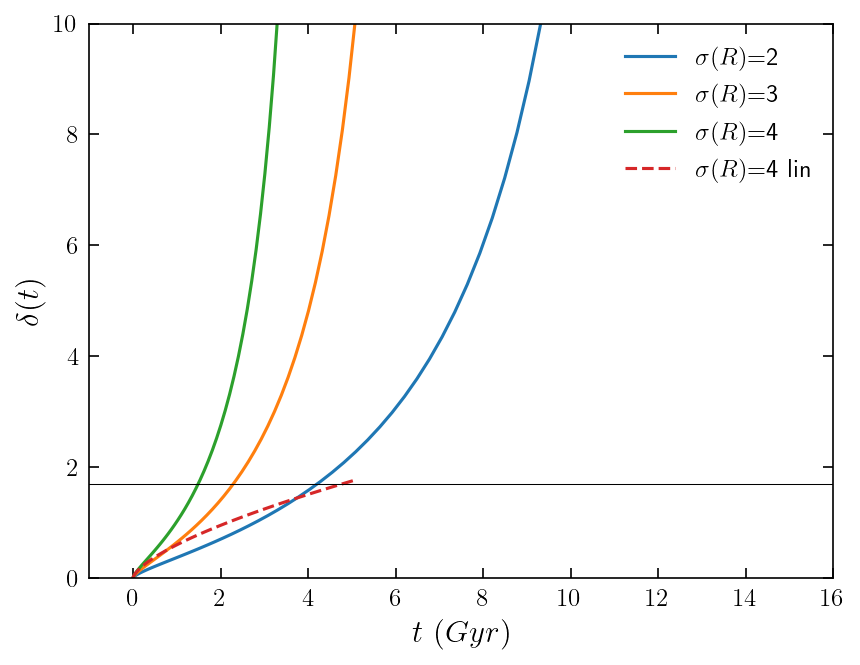

In [ ]:
for sigmaR in [ 2, 3, 4 ]:
    t, r, rlin, a = shell_collapse( sigmaR )
    den = (r[0]/a[0]/r*a)**3 - 1.
    plt.plot(t, den, label=(r'$\sigma(R)$=%g'%sigmaR))
    if sigmaR == 4:
        denlin = (rlin[0]/a[0]/rlin*a)**3 - 1.
        plt.plot(t, denlin, '--', label=(r'$\sigma(R)$=%g lin'%sigmaR))

plt.axhline(1.69, c='k', linewidth=0.5)
        
plt.xlabel(r'$t \ (Gyr)$')
plt.ylabel(r'$\delta(t)$')
plt.xlim(-1, 16)
plt.ylim(0, 10)
plt.legend(loc='upper right')